One factor Schwartz Model

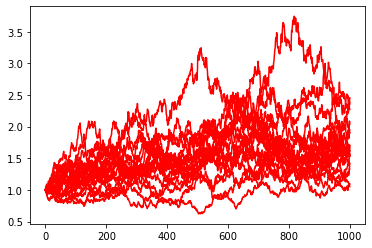

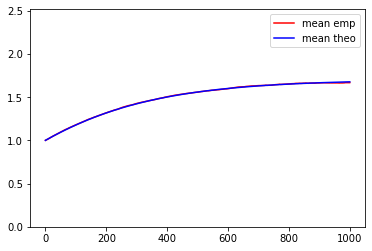

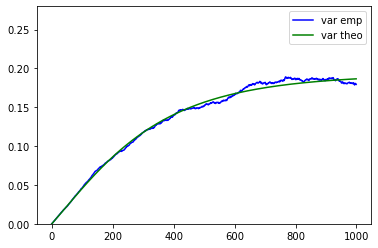

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt

T = 5.0
nb_simu = 5000
nb_time = 1000
kappa = .7
theta = .5
sigma = .3
r = .01
dt = T / float(nb_time)
dt_sqrt = math.sqrt(dt)
dW_t = np.random.normal(size=(nb_simu,nb_time)) * dt_sqrt

S0 = 1.0
s0 = math.log(S0)

S = np.zeros((nb_simu, nb_time))
s = np.zeros((nb_simu, nb_time))
t = np.arange(0, T, dt)

for i in range(0, nb_simu):
    S[i][0] = S0
    s[i][0] = s0
  
for i in range(0, nb_simu):
    for j in range(1, nb_time):
        s[i][j] = s[i][j-1] + kappa * (theta - s[i][j-1]) * dt + sigma * dW_t[i, j]
        S[i][j] = math.exp(s[i][j])
        
for i in range(0, 20):
    plt.plot(S[i], color='red')
    
plt.show()

mean_emp = np.zeros((nb_time))
var_emp = np.zeros((nb_time))

mean_theo = np.exp(np.exp(- kappa * t) * s0 + theta * (1.0 - np.exp(- kappa * t)) + sigma * sigma / (4.0 * kappa) * (1.0 - np.exp(- 2.0 * kappa * t)))
var_theo = (mean_theo ** 2) * (np.exp(sigma * sigma / (2.0 * kappa) * (1.0 - np.exp(- 2.0 * kappa * t))) - 1.0)

for i in range(0, nb_time):
    mean_emp[i] = np.mean(S[:,i])
    var_emp[i] = np.var(S[:,i])
    
plt.plot(mean_emp, color='red', label='mean emp')
plt.plot(mean_theo, color='blue', label='mean theo')
plt.legend()
plt.ylim(.0, 1.5 * max(mean_theo))
plt.show()

plt.plot(var_emp, color='blue', label='var emp')
plt.plot(var_theo, color='green', label='var theo')
plt.legend()
plt.ylim(0, 1.5 * max(var_theo))
plt.show()

Percentiles

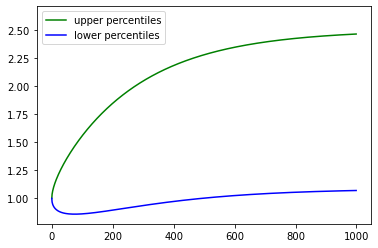

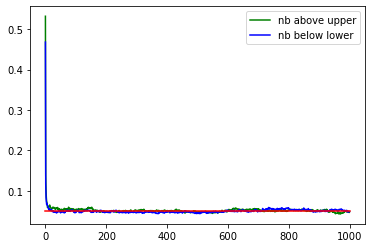

In [4]:
from scipy.stats import norm

mean_log = np.exp(- kappa * t) * s0 + theta * (1.0 - np.exp(- kappa * t))
var_log = sigma * sigma / (2.0 * kappa) * (1.0 - np.exp(- 2.0 * kappa * t))

def percentiles(kappa, theta, sigma, percentile, t):
    return np.exp(mean_log + np.sqrt(var_log) * norm.ppf(percentile))

perc = .05
upper_percentile = 1.0 - perc
lower_percentile = perc

upper_percentiles = percentiles(kappa, theta, sigma, upper_percentile, t)
lower_percentiles = percentiles(kappa, theta, sigma, lower_percentile, t)

def union(lst1, lst2): 
    final_list = list(set(lst1) | set(lst2)) 
    return final_list 
    
plt.plot(upper_percentiles, color='green', label='upper percentiles')
plt.plot(lower_percentiles, color='blue', label='lower percentiles')
plt.legend()
plt.ylim(.9 * min(lower_percentiles), 1.1 * max(upper_percentiles))
plt.show()   

# cross check
nb_above_upper = np.zeros((nb_time-1))
nb_below_lower = np.zeros((nb_time-1))

for i in range(0, nb_time-1):    
    for j in range(0, nb_simu):
        if S[j,i+1] > upper_percentiles[i]:
            nb_above_upper[i] = nb_above_upper[i] + 1.0 / float(nb_simu)
        
        if S[j,i+1] < lower_percentiles[i]:
            nb_below_lower[i] = nb_below_lower[i] + 1.0 / float(nb_simu)
          
plt.plot(nb_above_upper, color='green', label='nb above upper')
plt.plot(nb_below_lower, color='blue', label='nb below lower')
plt.plot(np.full((nb_time), perc), color='red')
plt.legend()
plt.show() 
    

Regression

In [5]:
import pandas as pd
from sklearn import linear_model

def regress(values, basis):
    values.reshape((len(values)))
    
    y = pd.DataFrame(values)
    X = pd.DataFrame(basis)
    
    linear_regression = linear_model.LinearRegression()
    linear_regression.fit(X, y)
    
    return linear_regression.predict(X).reshape((len(values)))
    

Swing Option

In [6]:
# clean up scenarios - discard generated outliers

S_max = 3.5

for i in range(0, nb_time-1):
    S[:,i] = np.minimum(S[:,i], np.full((nb_simu, S_max))

SyntaxError: unexpected EOF while parsing (<ipython-input-6-355091ef9308>, line 6)

0


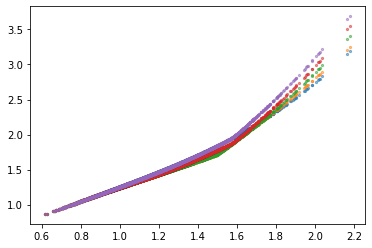

1


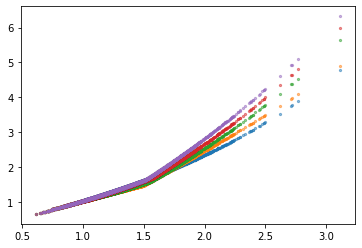

2


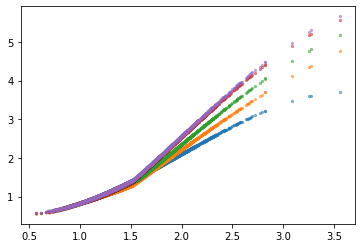

3


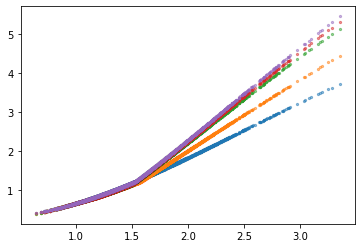

4


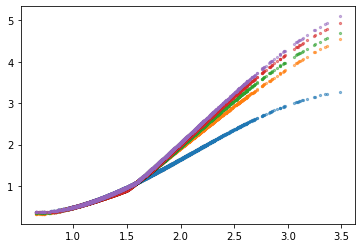

5


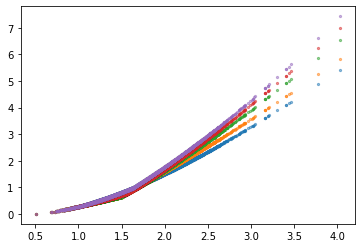

6


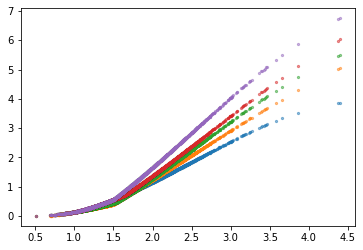

7


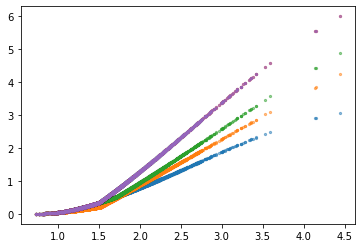

8


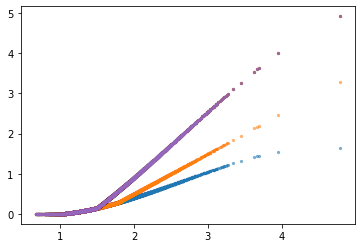

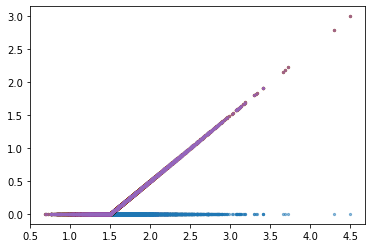

Exercise at first date: False
Exercise at date 2: True
Exercise at date 3: True
Exercise at date 4: True
Exercise at date 5: True
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


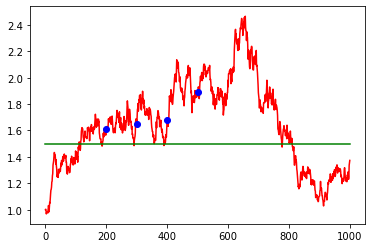

[0. 0. 0. 0. 0.] [False False False False False]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: True
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: True


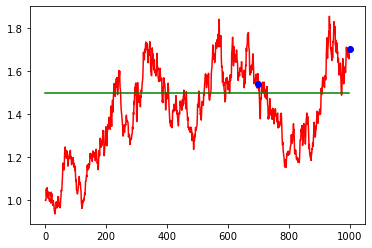

[0.         0.20251347 0.20251347 0.20251347 0.20251347] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


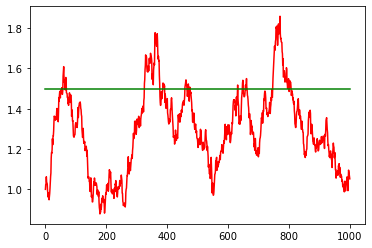

[0. 0. 0. 0. 0.] [False False False False False]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: True
Exercise at date 8: False
Exercise at date 9: True
Exercise at date 10: True


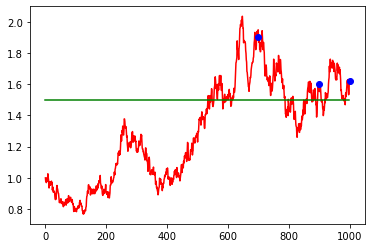

[0.         0.12081264 0.12081264 0.12081264 0.12081264] [False  True  True  True  True]
Exercise at first date: True
Exercise at date 2: True
Exercise at date 3: True
Exercise at date 4: True
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


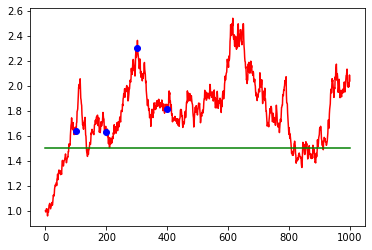

[0.         0.54034635 0.54034635 0.54034635 0.54034635] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: True
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: True
Exercise at date 6: True
Exercise at date 7: True
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


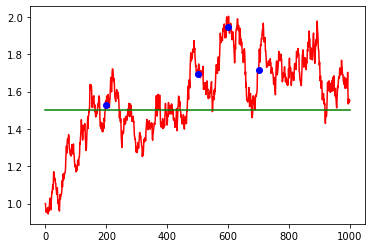

[0.         0.05159612 0.05159612 0.05159612 0.05159612] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: True
Exercise at date 7: True
Exercise at date 8: True
Exercise at date 9: False
Exercise at date 10: True


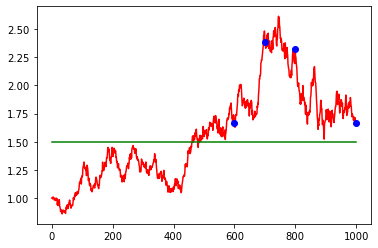

[0.         0.16345011 0.16345011 0.16345011 0.16345011] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: True
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: True
Exercise at date 10: True


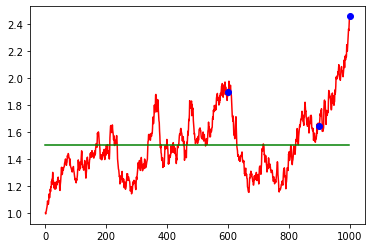

[0.         0.95493077 0.95493077 0.95493077 0.95493077] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: True
Exercise at date 7: True
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: True


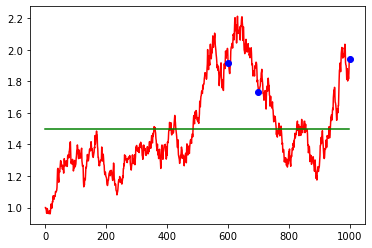

[0.         0.44321244 0.44321244 0.44321244 0.44321244] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: True
Exercise at date 8: False
Exercise at date 9: True
Exercise at date 10: True


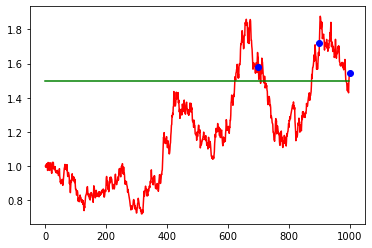

[0.         0.04734805 0.04734805 0.04734805 0.04734805] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: True
Exercise at date 3: True
Exercise at date 4: True
Exercise at date 5: True
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


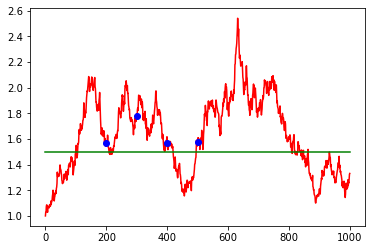

[0. 0. 0. 0. 0.] [False False False False False]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


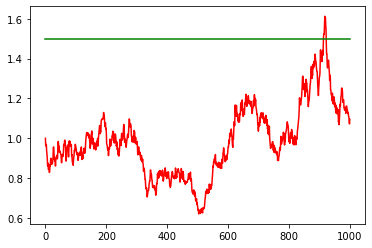

[0. 0. 0. 0. 0.] [False False False False False]
Exercise at first date: False
Exercise at date 2: True
Exercise at date 3: False
Exercise at date 4: True
Exercise at date 5: True
Exercise at date 6: True
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


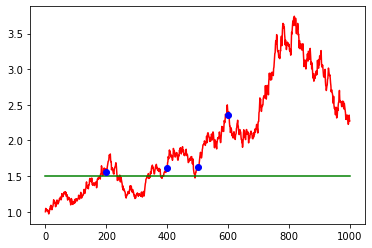

[0.         0.77438131 0.77438131 0.77438131 0.77438131] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: True
Exercise at date 8: True
Exercise at date 9: True
Exercise at date 10: True


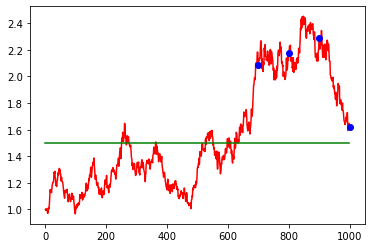

[0.         0.11665273 0.11665273 0.11665273 0.11665273] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: True
Exercise at date 3: True
Exercise at date 4: True
Exercise at date 5: True
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


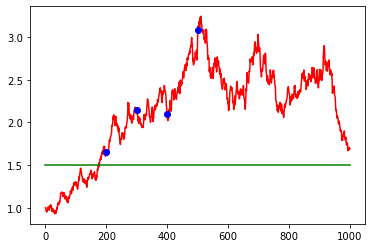

[0.         0.19442715 0.19442715 0.19442715 0.19442715] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: True
Exercise at date 10: True


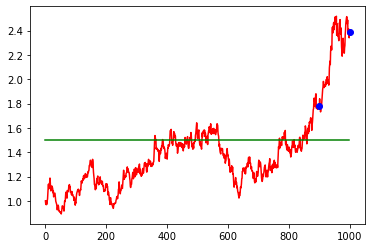

[0.         0.88678632 0.88678632 0.88678632 0.88678632] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: True
Exercise at date 6: True
Exercise at date 7: True
Exercise at date 8: True
Exercise at date 9: False
Exercise at date 10: False


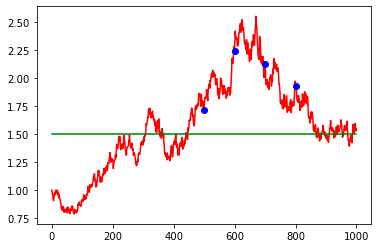

[0.         0.04558783 0.04558783 0.04558783 0.04558783] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: True
Exercise at date 10: True


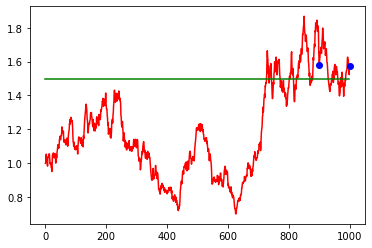

[0.         0.07544543 0.07544543 0.07544543 0.07544543] [False  True  True  True  True]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: False
Exercise at date 9: False
Exercise at date 10: False


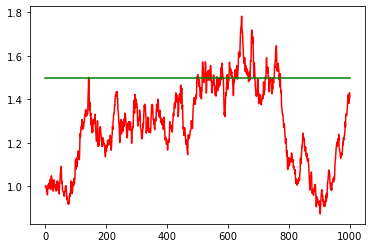

[0. 0. 0. 0. 0.] [False False False False False]
Exercise at first date: False
Exercise at date 2: False
Exercise at date 3: False
Exercise at date 4: False
Exercise at date 5: False
Exercise at date 6: False
Exercise at date 7: False
Exercise at date 8: True
Exercise at date 9: False
Exercise at date 10: True


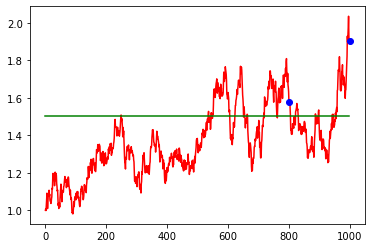

[0.         0.40290233 0.40290233 0.40290233 0.40290233] [False  True  True  True  True]


In [22]:
from scipy import optimize
from numpy import linalg as lin

nb_exercise_rights = 4
nb_exercise_dates = 10

nb_regression_dim = 3

K = 1.5

v = int(nb_time / nb_exercise_dates)

V = np.zeros((nb_exercise_dates,nb_exercise_rights+1,nb_simu))
u = np.zeros((nb_exercise_dates,nb_exercise_rights+1,nb_simu),dtype=bool)

def repair_paths(paths, floor, i):
    print(paths)
    paths = np.maximum(paths, np.full((len(paths)), floor))
    print(paths)
    
    # determine cap to match expectation
    mean_theoretical = mean_theo[i]
    
    def _mean(cap):
        print(cap)
        return np.mean(np.minimum(cap, paths))
    
    cap0 = 1.0
    sol = optimize.root(_mean, x0=3.0, jac=None, method='hybr')
    
    if not sol.success:
        raise Exception('Could not find matching cap!')
    
    cap_opt = sol.x 
    print(cap_opt)
    return np.mean(np.minimum(cap_opt, paths))
    

repair = True

for i in range(0, nb_simu):
    V[-1,0,i] = .0
    u[-1,0,i] = False
            
    for j in range(1, nb_exercise_rights+1):
        if S[i,-1] > K:
            V[-1,j,i] = S[i,-1] - K
            u[-1,j,i] = True
        else:
            V[-1,j,i] = .0
            u[-1,j,i] = False

            
for i in range(nb_exercise_dates-2, -1, -1):
    rollback = np.zeros((nb_exercise_rights+1,nb_simu))
    regressed_values = np.zeros((nb_exercise_rights+1,nb_simu))
    
    for j in range(0, nb_exercise_rights+1):
        # regress values
        rollback[j,:] = V[i+1,j,:] * math.exp(- r * dt * v)
        
        basis = np.zeros((nb_simu, nb_regression_dim+1))
        
        for k in range(0, nb_regression_dim+1):
            basis[:,k] = S[:,(i+1)*v]**k
        
        regressed_values[j,:] = regress(rollback[j,:], basis) 
        
        if repair:
            # floor values by zero
            regressed_values[j,:] = np.maximum(regressed_values[j,:], np.full((nb_simu), .0))           
        
            # ensure consistency between regressed values
            if j > 0:
                regressed_values[j,:] = np.maximum(regressed_values[j-1,:], regressed_values[j,:])
        
        #plt.scatter(S[:,(i+1)*v], regressed_values[j,:], s=5, alpha=.5, label="Regressed values at exercise date {0}".format(i + 1))   
    
    #plt.show()
                    
    val_exercise = np.zeros((nb_exercise_rights+1,nb_simu))
    val_continuation = np.zeros((nb_exercise_rights+1,nb_simu))        
    
    #case : all rights are already exercised
    for k in range(0,nb_simu):
        V[i,0,k] = regressed_values[nb_exercise_rights,k] 
        u[i,0,k] = False
    
    for j in range(1, nb_exercise_rights+1):
        val_exercise[j,:] = np.maximum(S[:,(i+1)*v] - K, np.zeros((nb_simu))) + regressed_values[j-1,:]                    
        val_continuation[j,:] = regressed_values[j,:]
                  
        for k in range(0,nb_simu):
            if val_exercise[j,k] > val_continuation[j,k]:
                V[i,j,k] = val_exercise[j,k]
                u[i,j,k] = True
                
                if regressed_values[j-1,k] > regressed_values[j,k]:
                    raise Exception('Inconsistency for (i,j,k)=({0},{1},{2}): {3}, {4}'.format(i,j,k,regressed_values[j-1,k],regressed_values[j,k]))
                
            else:
                V[i,j,k] = val_continuation[j,k]  
                u[i,j,k] = False

for i in range(0, nb_exercise_dates-1):
    print(i)
    for j in range(0, nb_exercise_rights+1):
        _S = S[:,(i+1)*v]
        _V = V[i,j,:]        
        plt.scatter(_S, _V, s=5, alpha=.5, label="Value at execrice date {0}".format(i + 1))          
    plt.show()
    
for j in range(0, nb_exercise_rights+1):
    _S = S[:,-1]
    _V = V[-1,j,:]        
    plt.scatter(_S, _V, s=5, alpha=.5, label="Value at execrice date {0}".format(i + 1))          
plt.show()
    
for path in range(0,20):    
    plt.plot(S[path,:], color='red', label='S')
    plt.plot(np.full((nb_time), K), color='green', label='K')    

    exercise_rights_left = nb_exercise_rights
    print("Exercise at first date: " + str(u[0,nb_exercise_rights,path]))

    if u[0,nb_exercise_rights,path]:
        exercise_rights_left = exercise_rights_left - 1
        plt.plot(v,S[path,v],'ro',color='blue') 

    for i in range(1,nb_exercise_dates):
        print("Exercise at date {0}: {1}".format(i+1,u[i,exercise_rights_left,path]))
        if u[i,exercise_rights_left,path]:
            exercise_rights_left = exercise_rights_left - 1
            if i == nb_exercise_dates - 1:
                plt.plot((i+1)*v,S[path,(i+1)*v-1],'ro',color='blue')
            else:
                plt.plot((i+1)*v,S[path,(i+1)*v],'ro',color='blue')
    
    plt.show()
    print(V[-1,:,path], u[-1,:,path])

